In [1]:
# loading the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\JEEVAN\Downloads\TaxiFare.csv")
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
data.shape

(50000, 8)

In [4]:
data.info()    # their is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


## Target variable  (amount)

In [5]:
data.amount.describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

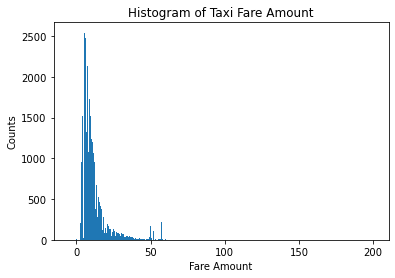

In [6]:
# histogram of amount
plt.hist(data.amount,bins='auto')
plt.xlabel('Fare Amount')
plt.ylabel('Counts')
plt.title('Histogram of Taxi Fare Amount')
plt.show()

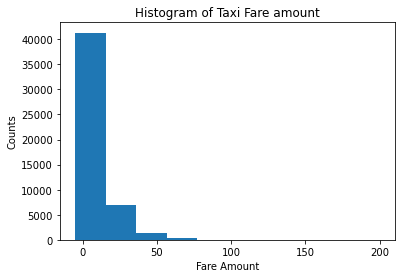

In [7]:
# or else you can draw like this
plt.hist(data.amount)
plt.xlabel("Fare Amount")
plt.ylabel('Counts')
plt.title('Histogram of Taxi Fare amount')
plt.show()

<AxesSubplot:>

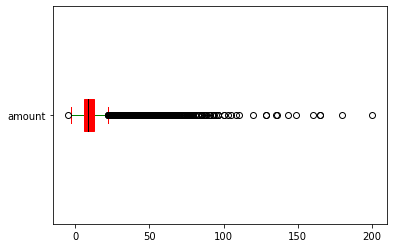

In [8]:
# Boxplot
props2=dict(boxes='red',whiskers='green',medians='black',caps='red')
data.amount.plot.box(color=props2,patch_artist=True,vert=False)    # outliers

<AxesSubplot:xlabel='amount'>

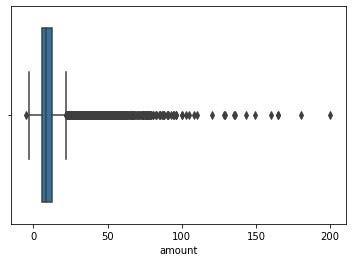

In [9]:
# or you can do boxplot veryeasily

sns.boxplot(data.amount)


In [10]:
# getting the IQR,upper_limit,Lower_limit

IQR=data.amount.quantile(0.75)-data.amount.quantile(0.25)
IQR

6.5

In [11]:
HE=data.amount.quantile(0.75)+(1.5*IQR)
HE

22.25

In [12]:
LE=data.amount.quantile(0.25)-(1.5* IQR)
LE

-3.75

In [13]:
len(data[data.amount>HE])

4364

In [14]:
len(data[data.amount<LE])

1

In [15]:
# Getting the count of values
data.amount.value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

In [16]:
for i in range(22,32,1):
    data_len=len(data.amount[data.amount>i])
    print('Taxi Fare paid more than :',i,'No of passengers :',data_len)

Taxi Fare paid more than : 22 No of passengers : 4413
Taxi Fare paid more than : 23 No of passengers : 4092
Taxi Fare paid more than : 24 No of passengers : 3828
Taxi Fare paid more than : 25 No of passengers : 3576
Taxi Fare paid more than : 26 No of passengers : 3336
Taxi Fare paid more than : 27 No of passengers : 3096
Taxi Fare paid more than : 28 No of passengers : 2931
Taxi Fare paid more than : 29 No of passengers : 2724
Taxi Fare paid more than : 30 No of passengers : 2581
Taxi Fare paid more than : 31 No of passengers : 2380


## date_time_of_pickup

## where data_time_of_pickup is in the object we want to convert it into date time format

In [17]:
data.date_time_of_pickup.describe()

count                       50000
unique                      49555
top       2011-09-03 01:30:00 UTC
freq                            3
Name: date_time_of_pickup, dtype: object

In [18]:
data.date_time_of_pickup.head()

0    2009-06-15 17:26:21 UTC
1    2010-01-05 16:52:16 UTC
2    2011-08-18 00:35:00 UTC
3    2012-04-21 04:30:42 UTC
4    2010-03-09 07:51:00 UTC
Name: date_time_of_pickup, dtype: object

In [19]:
# first we are going to convert it in to datetime format
data.date_time_of_pickup=pd.to_datetime(data.date_time_of_pickup)

In [20]:
data.info()    # see you can see here the date_time_of_pickup has been converted in to datatime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [21]:
data.date_time_of_pickup.head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [22]:
# now will extract year,month,data and hour seperatly
import datetime as dt

data['year']=data.date_time_of_pickup.dt.year
data['month']=data.date_time_of_pickup.dt.month_name()
data['day']=data.date_time_of_pickup.dt.day_name()
data['hour']=data.date_time_of_pickup.dt.hour   # 24hrs

## YEAR

Text(0.5, 1.0, 'Yearwise counting')

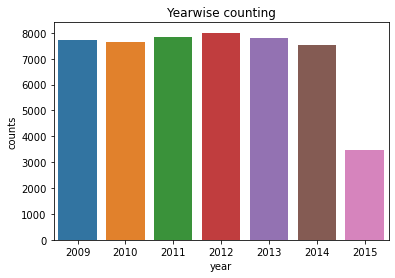

In [23]:
# Year 
# Barplot/countplot
sns.countplot(x='year',data=data)
plt.xlabel("year")
plt.ylabel('counts')
plt.title("Yearwise counting")

In [24]:
data.year.value_counts()

2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: year, dtype: int64

Text(0.5, 1.0, 'Boxplot of Year')

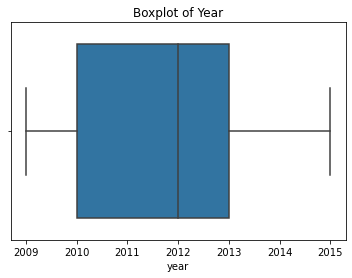

In [25]:
# boxplot 
sns.boxplot(data.year)
plt.title('Boxplot of Year')

In [26]:
data.groupby('year')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2009,7716.0,10.049168,8.447096,2.5,5.7,7.7,11.3,165.00
2010,7646.0,10.137180,8.406004,-2.9,5.7,7.7,11.3,143.00
2011,7832.0,10.465931,8.467032,2.5,5.7,7.7,11.7,96.00
2012,8005.0,11.228863,9.667937,2.5,6.0,8.5,12.5,200.00
2013,7819.0,12.439474,10.428842,-3.0,6.5,9.5,14.0,180.00
2014,7530.0,13.139649,11.311478,2.5,6.5,9.5,15.0,165.00
2015,3452.0,13.064392,10.799374,-5.0,6.5,9.5,15.0,96.25


Text(0, 0.5, 'count')

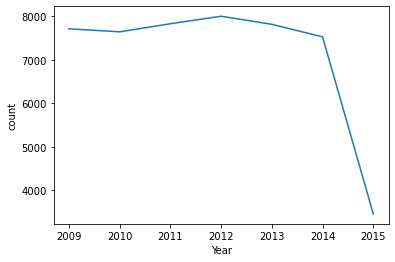

In [27]:
plt.plot(data.groupby('year')['amount'].count())
plt.xlabel('Year')
plt.ylabel('count')

Text(0, 0.5, 'Average')

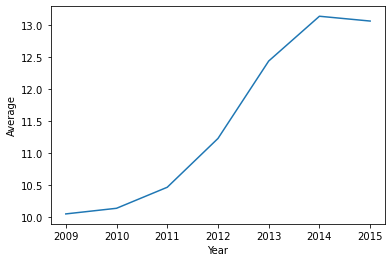

In [28]:
plt.plot(data.groupby('year')['amount'].mean())
plt.xlabel('Year')
plt.ylabel('Average')

## Month

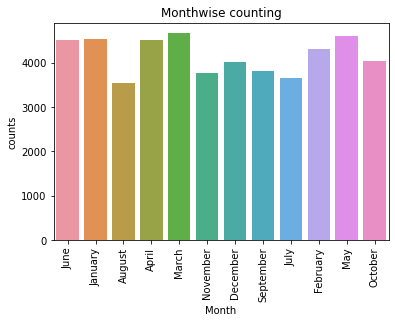

In [29]:
sns.countplot(x='month', data=data)
plt.xlabel("Month")
plt.ylabel('counts')
plt.title("Monthwise counting")
plt.xticks(rotation=90)
plt.show()

In [30]:
data.groupby('month')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
April,4519.0,11.321361,9.487037,-2.5,6.0,8.5,12.5,93.75
August,3543.0,11.316616,10.315227,-3.0,6.0,8.5,12.5,165.00
December,4015.0,11.670543,10.212445,2.5,6.0,8.5,13.0,135.00
February,4302.0,10.933728,9.510653,0.0,6.0,8.1,12.1,200.00
January,4546.0,10.700930,9.235979,2.5,5.7,8.0,11.7,180.00
July,3656.0,10.937166,8.947714,2.5,6.0,8.1,12.1,120.00
June,4516.0,11.457146,9.267060,2.5,6.1,8.5,13.0,96.25
March,4671.0,11.085596,9.172258,-5.0,5.8,8.1,12.5,80.50
May,4612.0,11.868103,10.307439,0.0,6.1,8.9,13.3,160.00


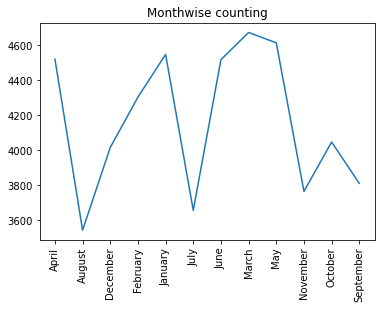

In [31]:
#Plots for COUNTS as per alphabetical order
plt.plot(data.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

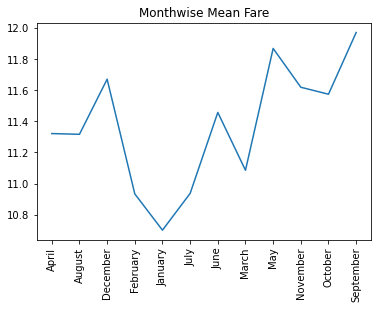

In [32]:
# plot for MEAN
plt.plot(data.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

In [33]:
#Creating dict file
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
         'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}

In [34]:
data.month = [month[item] for item in data.month]
print(data.month)

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64


In [35]:
data.month

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64

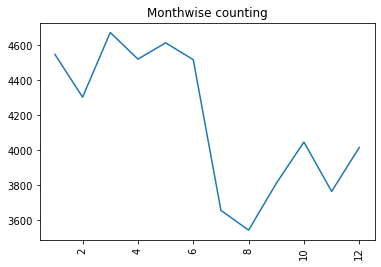

In [36]:
# Plot COUNTS as per calendar
plt.plot(data.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()



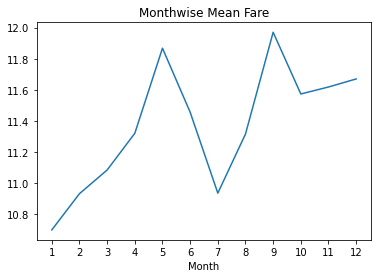

In [37]:
# Plot MEAN as per calendar
plt.plot(data.groupby('month')['amount'].mean())
plt.xticks(rotation=0)
plt.xlabel('Month')
plt.title("Monthwise Mean Fare")
plt.xticks(ticks=list(np.arange(1,13,1)))
plt.show()

## day

Text(0.5, 1.0, 'Weekday wise counting')

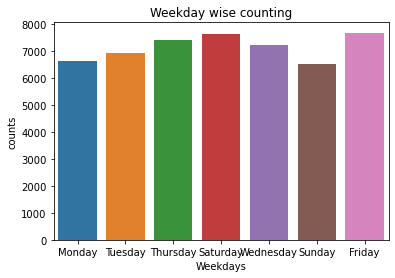

In [38]:
#Barplot/ Countplot
sns.countplot(x='day', data=data)
plt.xlabel("Weekdays")
plt.ylabel('counts')
plt.title("Weekday wise counting")

In [39]:
data.groupby('day')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Friday,7668.0,11.402240,9.508604,-3.0,6.1,8.5,13.0,165.00
Monday,6639.0,11.569060,10.536296,-5.0,6.0,8.1,12.5,160.00
Saturday,7630.0,11.142731,9.201668,2.5,6.0,8.5,12.5,165.00
Sunday,6518.0,11.520578,9.954766,-2.5,6.0,8.5,13.0,200.00
Thursday,7406.0,11.668594,9.983516,-2.5,6.0,8.5,13.0,149.00
Tuesday,6927.0,11.166999,9.282690,-2.9,6.0,8.5,12.5,92.49
Wednesday,7212.0,11.104773,9.357399,2.5,6.0,8.5,12.5,180.00


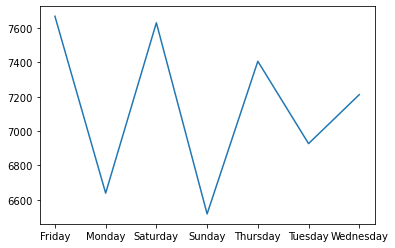

In [40]:
plt.plot(data.groupby('day')['amount'].count())

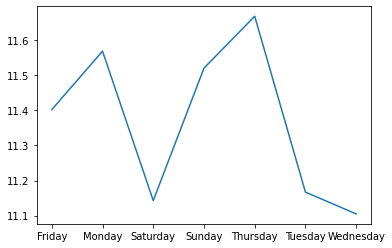

In [41]:
plt.plot(data.groupby('day')['amount'].mean())

In [42]:
#Creating dict file
day = {'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 
       'Friday':6, 'Saturday':7 }

In [43]:
data.day=[day[item] for item in data.day]
data.day.head()

0    2
1    3
2    5
3    7
4    3
Name: day, dtype: int64

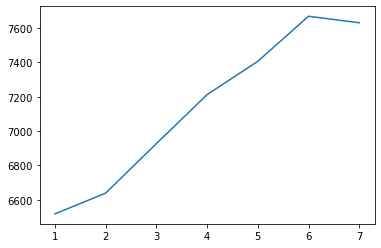

In [44]:
plt.plot(data.groupby('day')['amount'].count())

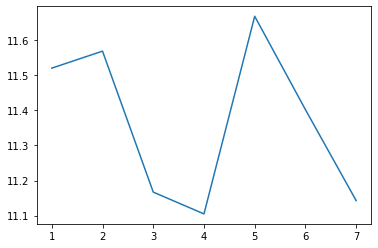

In [45]:
plt.plot(data.groupby('day')['amount'].mean())

## hour

Text(0.5, 1.0, 'Hourly counting')

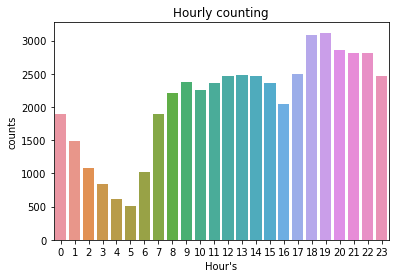

In [46]:
#Barplot 

sns.countplot(x='hour',data=data)
plt.xlabel("Hour's")
plt.ylabel('counts')
plt.title("Hourly counting")

<AxesSubplot:xlabel='hour'>

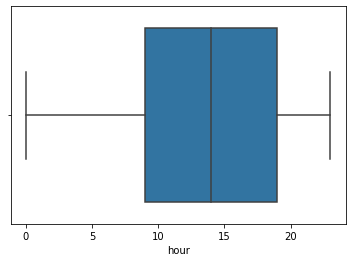

In [47]:
sns.boxplot(data.hour)

In [48]:
data.groupby('hour')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,1890.0,11.922873,8.592224,2.5,6.50,9.30,14.50,88.25
1,1484.0,11.726065,9.043038,2.5,6.50,9.00,14.10,128.83
2,1088.0,11.246765,8.628222,2.5,6.10,8.90,13.70,136.00
3,847.0,12.087237,12.358673,2.5,6.00,8.90,14.50,200.00
4,610.0,13.740623,10.944349,2.5,6.50,10.00,17.70,80.35
5,508.0,15.338209,14.856332,-2.5,5.95,9.15,18.60,82.50
6,1017.0,12.280570,12.168081,2.5,5.30,7.70,12.50,78.50
7,1899.0,11.121827,10.251250,2.5,5.70,8.00,11.70,87.00
8,2209.0,10.611852,8.604485,-3.0,6.00,8.10,11.70,95.00


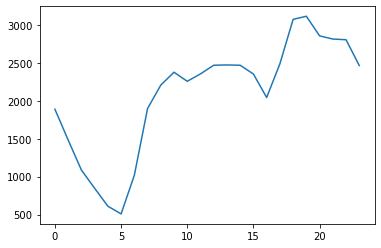

In [49]:
plt.plot(data.groupby('hour')['amount'].count())

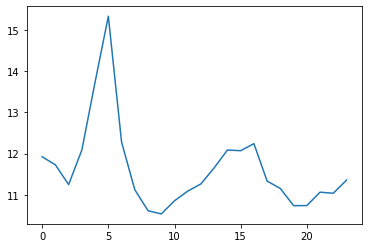

In [50]:
plt.plot(data.groupby('hour')['amount'].mean())

In [51]:
# longitude_of_pickup
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
dtypes: d

In [52]:
data.latitude_of_pickup.describe()

count    50000.000000
mean        39.933759
std          6.224857
min        -74.006893
25%         40.734880
50%         40.752678
75%         40.767360
max        401.083332
Name: latitude_of_pickup, dtype: float64

Text(0.5, 1.0, 'Boxplot of latitude_of_pickup')

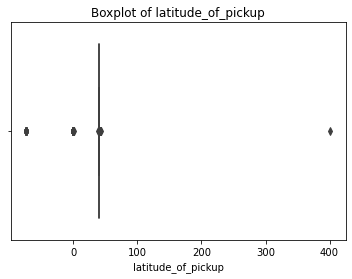

In [53]:
sns.boxplot(data.latitude_of_pickup)
plt.title('Boxplot of latitude_of_pickup')

In [54]:
# getting the IQR,upper_limit,Lower_limit

IQR=data.latitude_of_pickup.quantile(0.75)-data.latitude_of_pickup.quantile(0.25)
IQR

0.03248049999999836

In [55]:
HE=data.latitude_of_pickup.quantile(0.75)+(1.5*IQR)
HE

40.816081249999996

In [56]:
LE=data.latitude_of_pickup.quantile(0.25)-(1.5* IQR)
LE

40.68615925

In [57]:
len(data[data.latitude_of_pickup>HE])

247

In [58]:
len(data[data.latitude_of_pickup<LE])

2116

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
dtypes: d

In [60]:
data.latitude_of_pickup.describe()

count    50000.000000
mean        39.933759
std          6.224857
min        -74.006893
25%         40.734880
50%         40.752678
75%         40.767360
max        401.083332
Name: latitude_of_pickup, dtype: float64

<AxesSubplot:xlabel='latitude_of_pickup'>

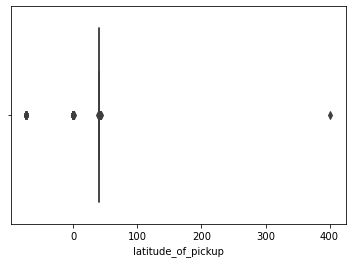

In [61]:
sns.boxplot(data.latitude_of_pickup)

<AxesSubplot:xlabel='longitude_of_pickup', ylabel='latitude_of_pickup'>

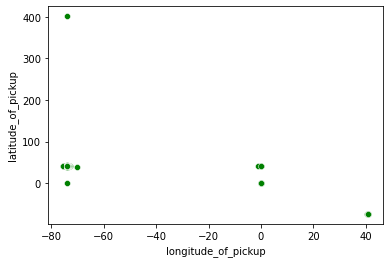

In [62]:
sns.scatterplot(data.longitude_of_pickup,data.latitude_of_pickup, color='green')


In [63]:
# in all the columns you want to perform the same

In [64]:
data.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
x=data.loc[:,data.columns!='amount']
y=data.loc[:,data.columns=='amount']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Building the model by using the random forest regressor [because it a regressor model where the traget variable is continious]

# model1

In [72]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)

In [74]:
mod=regressor.fit(x_train,y_train)
y_pred=mod.predict(x_test)

In [75]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [77]:
rmse=np.sqrt(mse)
rmse

4.483305982226583

In [78]:
# ploting the graph

In [79]:
y_test.shape

(15000, 1)

In [83]:
y_test=y_test.iloc[:,0]

In [84]:
residuals=y_test-y_pred

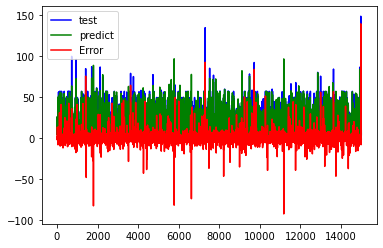

In [88]:
obsno=np.arange(15000)
plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_pred,'g')
plt.plot(obsno,residuals,'r')
plt.legend(labels=('test','predict','Error'))
plt.show()

In [91]:
# extract feature importance

fi=pd.DataFrame({'feature':list(x_train.columns),'importance':mod.feature_importances_}).sort_values('importance',ascending=False)
fi

,feature,importance
2,longitude_of_dropoff,0.394514
0,longitude_of_pickup,0.237887
3,latitude_of_dropoff,0.163141
1,latitude_of_pickup,0.117255
5,year,0.024585
8,hour,0.024332
6,month,0.017729
7,day,0.013882
4,no_of_passenger,0.006675


In [106]:
x_train1=x_train.iloc[:,[2,0,3,1]]

In [107]:
x_test1=x_test.iloc[:,[2,0,3,1]]

# Model 2

In [110]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
model2=regressor.fit(x_train1,y_train)

In [112]:
y_predict=model2.predict(x_test1)

In [116]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(y_test,y_predict)
mse2

22.73131957864993

In [128]:
rmse2=np.sqrt(mse2)
rmse2

4.7677373646888235

In [121]:
residuals2=y_test-y_predict

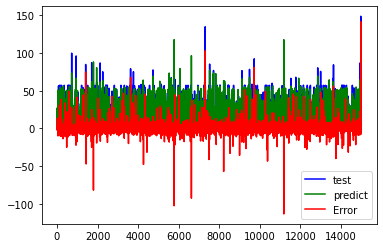

In [122]:
obsno=np.arange(15000)
plt.plot(obsno,y_test,'b')
plt.plot(obsno,y_predict,'g')
plt.plot(obsno,residuals2,'r')
plt.legend(labels=('test','predict','Error'))
plt.show()

# Model 3

In [142]:
# now will build the model using gridsearch

from sklearn.model_selection import GridSearchCV
param_grid={'bootstrap':[True],'max_depth':[4,5,6,7,8,9],'max_features':["auto", "sqrt", "log2"],'n_estimators':[25,50,100]}
rfr=RandomForestRegressor(random_state=1)
g_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=3)
gmod=g_search.fit(x_train1,y_train)

In [143]:
# best parameters
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}


In [144]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(bootstrap=True,max_depth=9,max_features='auto',n_estimators=100)

In [145]:
model3=regressor.fit(x_train1,y_train)

In [146]:
y_predict=model3.predict(x_test1)

In [147]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)

In [148]:
rmse=np.sqrt(mse)
rmse

5.45297276349789

# Model 4